# S2: AirBnb NYC 2024 Listings
by: Tam Trinh           
March 24, 2025         

<a id="0"></a> <br>
## Table of Contents  

- [Sprint Goals](#6)
- [Introduction](#1)
- [Set-up and Dataset Overview](#7)
- [Part 1: EDA](#2)
- [Part 2: Preprocessing](#3)   
- [Part 3: Modeling](#4) 
- [Conclusion](#5)

<a id="6"></a>
## Sprint Goals

- In sprint 1 analysis of the Airbnb NYC 2024 dataset, the data will be explored and assessed for data quality, possible feature engineering, and future machine learning processes. 
- In sprint 2, the focus will shift to setting up the modeling. There will be an initial run-through of the process, with at least one model, and evaluation metrics. Feature engineering to improve the model and additional EDA will also be conducted.

<a id="1"></a>
## Introduction

Airbnb is a major homestay booking service. In 2024, there were an estimated 490 million bookings of nights and experiences, giving Airbnb an estimated 83 billion market capitalization, and generating about 11 billion dollar revenue in 2024. Airbnb has listings worldwide, with over 5 million hosts, listing an estimated 7.7 million listings. Hosts may not know the best price for their property, they can under-price and lose out on revenue, or over-price and lose out on bookings. There are dynamic pricing tools, but they tend to take a black-box approach, and hosts usually do not know how the pricing is calculated. There is an opportunity to help with better pricing, more transparency, and better customization.

Using Airbnb’s NYC 2024 Listings data and the use of machine learning tools such as linear regression (and optionally classification and content recommender) to give hosts information to choose a best-fit price so that hosts and renters can experience a fairer price.

<a id="7"></a>
## Set-up and Dataset Overview

In [1]:
# imports for functionality and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# optional imports
import warnings

# imports for preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# imports for modeling
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from tempfile import mkdtemp
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression


In [2]:
# optional settings

# # ignore warnings
# from warnings import filterwarnings
# warnings.filterwarnings('ignore')

# # display max col and rows
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [3]:
# load dataset 
airbnb_df = pd.read_csv("../data/new_york_listings_2024.csv")

In [4]:
# look at header
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1


In [5]:
# find df shape
airbnb_df.shape

print(f"Dataset number of observations: {airbnb_df.shape[0]}")
print(f"Dataset number of columns: {airbnb_df.shape[1]}")

Dataset number of observations: 20758
Dataset number of columns: 22


In [6]:
# look at df info (col and dtypes)
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

In [7]:
# look at df describe/stats
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.075800e+04,2.075800e+04,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,3.034044e+17,1.749316e+08,40.726798,-73.939161,187.776616,28.558435,42.642596,1.257910,18.844108,205.990317,10.852105,1.723721
std,3.901216e+17,1.725541e+08,0.060294,0.061403,1022.797208,33.536518,73.561654,1.904661,70.910834,135.087768,21.357071,1.212272
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.708808e+07,2.041738e+07,40.684150,-73.980710,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.993003e+07,1.087271e+08,40.722820,-73.949587,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.216019e+17,3.144102e+08,40.763098,-73.917460,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.054376e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


<a id="2"></a>
## Part 1: Exploratory Data Analysis (EDA)

In this sprint 1 initial EDA, data quality was assessed by looking into duplicates and null values. This dataset came pre-cleaned and does not contain duplicates. The dataset also does not contain null values, however, after further exploration, some columns contain miscellaneous entries that can be treated similary to null values. For example, the "bath" feature contains entries noting "Not specified," for this case, an average number of baths based on the number of beds can be imputed. Another feature, "bedrooms," contains mostly numeric entries, however, some rows are instead labeled as "Studio," these can be converted to 0, to stay consistent with the numeric datatype. 

The target variable "price" ranges from 10 to 100,000, however, after a univariate exploration, it can be seen that most datapoints fall below 500. Further pre-processing can experiment with how handling outlier prices affects the model. The feature of "rating" can also be used as an optional target variable. It ranges from 0 to 5, with a high peak at the ceiling value of 5, and most values falling between 4 and 5. 

Dependent variables were also explored. The data is relatively clean, however there still remains a lot of room for pre-processing and feature engineering. For example, the feature "neighbourhood" has over 200 unique values and would be too many for dummy variables. However, neighborhood can be a very strong predictor of price, therefore a new feature containing the average neighborhood price can be imputed inplace of the neighborhood name. This numerical change would likely help with the linear regression prediction of price. Another feature engineering tool, such as binning could also be used. The "number of reviews" and "reviews per month" have many different numberical values that could benefit from being binned into more predictive bins. This dataset would also benefit from scaling. Since price is a much larger number than the other features, it is likely to benefit from a StandardScaler. There are also features that showed a exponential curve and could benefit from an exponential transformer. 

Bivariate relationships were also explored. A scatterplot of price and rating indicates that there is likely a positive correlation between price and rating, and that rating could be a strong predictor of price. A boxplot of price and number of beds also indicates that there could be a predictive relationship. As the number of beds increase from 1 to 8, the price also tends to increase. However, after 9 beds, it becomes less predictive. A lineplot between price and month was also explored, and showed that there was a spike in March and October, further analysis could look into the granulary of the dates, and could possibly explore weekends and holidays as features. 

Overall, this dataset has good quality and would be a good candidate for machine learning processes such as linear regression, and possibly classification and recommender systems. 

### Check for duplicates and null values

In [8]:
# create a copy to work with
aircopy = airbnb_df.copy()

In [9]:
# check for duplicates
aircopy.duplicated().sum()

# 0 duplicates -> great

0

In [10]:
# check for null values
aircopy.isna().sum()

# no null values in entire dataset -> GREAT

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

### Explore Target Feature(s)

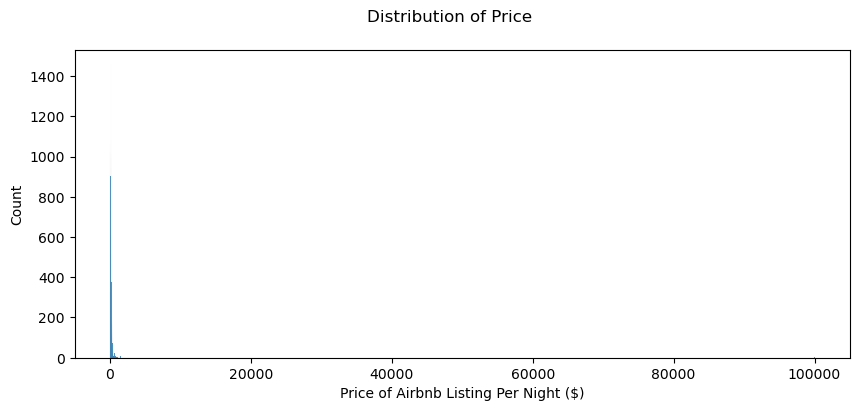

In [11]:
# plot the distribution of Price
plt.figure(figsize=(10, 4))
sns.histplot(aircopy, x="price")
plt.suptitle("Distribution of Price")
plt.xlabel("Price of Airbnb Listing Per Night ($)")
plt.ylabel("Count")
plt.show()

# there are some high outliers -> zoom into the area with more data points

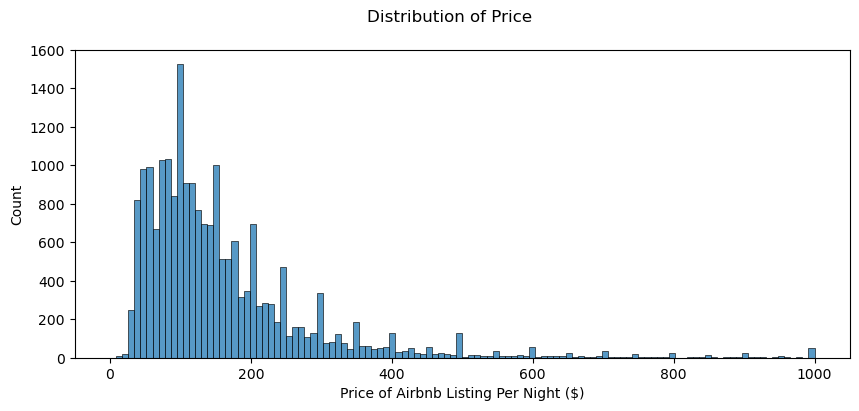

In [12]:
# plot the distribution of Price with binrange
plt.figure(figsize=(10, 4))
sns.histplot(aircopy, x="price", binrange=(0,1000))
plt.suptitle("Distribution of Price")
plt.xlabel("Price of Airbnb Listing Per Night ($)")
plt.ylabel("Count")
plt.show()

# setting a max price of 500 allows a clearer picture of most of the price data,
# a threshold of 1000 could work too

In [13]:
len( aircopy[ (airbnb_df["price"] > 500) ] )

# finding the amount of rows that are ignored by the binrange, 730 rows have prices over $500 and are not seen in the above plot
# -> these might be dealt with in future feature engineering (such as creating a dummy variable for price outliers)
# -> only 3.52% of listings have price over $500, future analysis will likely remove to focus on prices less than $500

730

In [14]:
730/20758 * 100

3.516716446671163

In [15]:
aircopy["rating"].value_counts()

# currently the rating column is in object datatype, which makes it difficult to manipulate, 
# although most of the rows are numeric, some rows contain text such as "No rating" and "New"
# -> depending on future algo, text rows can be changed to null or imputed with an avg value

rating
No rating    3593
5.0          2882
4.67          517
4.75          469
4.80          439
             ... 
4.02            1
3.42            1
3.73            1
3.26            1
2.75            1
Name: count, Length: 162, dtype: int64

In [16]:
# subsetting into a smaller df to only contain rows with numeric
air_rating = aircopy[ (aircopy["rating"] != "No rating") & (aircopy["rating"] != "New ") ]

In [17]:
# convert rating column to type float
air_rating["rating"] = air_rating["rating"].astype(float)

/var/folders/s2/vdwvjj2j24d4tg5yz10ycr080000gn/T/ipykernel_14473/453182835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_rating["rating"] = air_rating["rating"].astype(float)


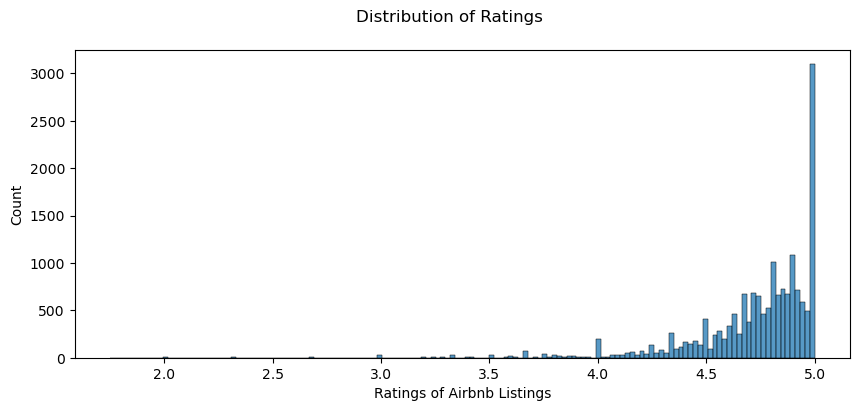

In [18]:
# plot the distribution of ratings
plt.figure(figsize=(10,4))
sns.histplot(air_rating, x="rating")
plt.suptitle("Distribution of Ratings")
plt.xlabel("Ratings of Airbnb Listings")
plt.ylabel("Count")
plt.show()

# there is a high count of ratings at the ceiling rating of 5.0,
# the rest of the ratings are mostly between 4 and 5, with a left-skew

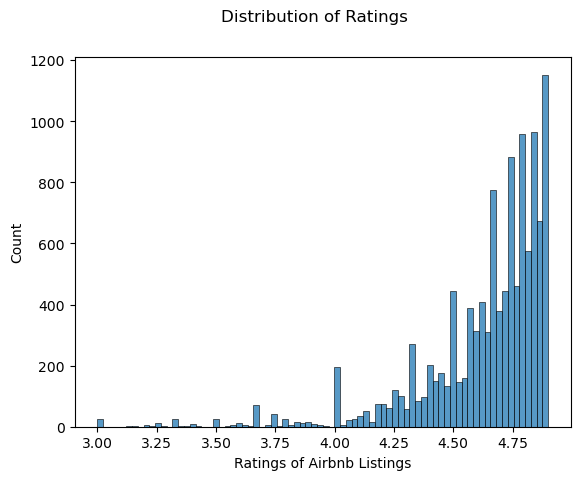

In [19]:
# plot the distribution of ratings, omitting 5.0 and zooming in to at least 3.0
plt.figure()
sns.histplot(air_rating, x="rating", binrange=(3, 4.9))
plt.suptitle("Distribution of Ratings")
plt.xlabel("Ratings of Airbnb Listings")
plt.ylabel("Count")
plt.show()

# this plot shows less outliers and likely has more predictive power

### Explore Independent Features

In [20]:
aircopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

In [21]:
# looking into column name
aircopy["name"].head(10)

# does not look like name column adds much information or description
# -> could be used for simple NLP, such as word cloud, could also be sifted further for a binary or dummy variable
# -> for current purposes, will be dropped from modeling

0           Rental unit in Brooklyn · ★5.0 · 1 bedroom
1    Rental unit in New York · ★4.67 · 2 bedrooms ·...
2    Rental unit in New York · ★4.17 · 1 bedroom · ...
3    Rental unit in New York · ★4.64 · 1 bedroom · ...
4    Condo in New York · ★4.91 · Studio · 1 bed · 1...
5    Rental unit in New York · ★5.0 · 1 bedroom · 1...
6    Rental unit in New York · ★4.33 · Studio · 1 b...
7    Rental unit in New York · ★4.50 · 2 bedrooms ·...
8    Rental unit in Brooklyn · ★4.79 · 1 bedroom · ...
9    Rental unit in Brooklyn · ★4.67 · 1 bedroom · ...
Name: name, dtype: object

In [22]:
# looking into column host_id

# aircopy["host_id"].value_counts()

aircopy["host_id"].nunique()

# 12,449 unique host_ids

12449

In [23]:
len(aircopy["host_id"].value_counts().loc[lambda x: x==1])

len(aircopy["host_id"].value_counts().loc[lambda x: x>5])

# 9,625 hosts have only 1 listing
# 336 hosts with greater than 5 listings

336

In [24]:
# looking into host_name

aircopy["host_name"].nunique()

# 5,815 unique host_names, can further explore why mismatch with host_ids
# -> most likely less predictive in regression models and likely won't be used
# -> for current purposes, will be dropped from modeling

5815

In [25]:
# looking into neighborhood group

aircopy["neighbourhood_group"].value_counts()

# shows the count of listings by nyc boroughs; highest is Manhattan, then Brooklyn, Queens, Bronx, Staten Island
# -> will likely be turned into dummy variables

neighbourhood_group
Manhattan        8038
Brooklyn         7719
Queens           3761
Bronx             949
Staten Island     291
Name: count, dtype: int64

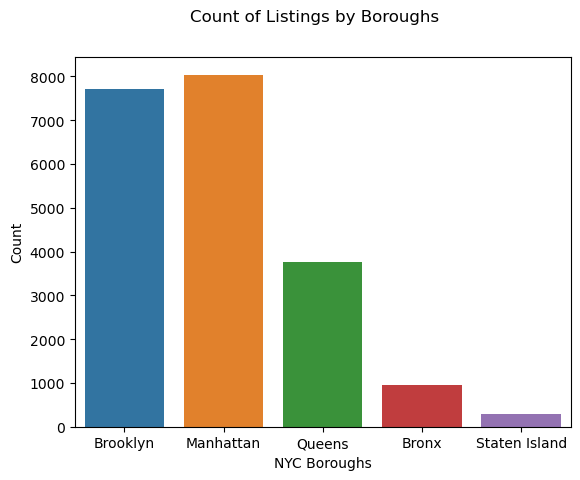

In [26]:
# plot the histogram of Listings by NYC Boroughs
plt.figure()
sns.countplot(aircopy, x="neighbourhood_group")
plt.suptitle("Count of Listings by Boroughs")
plt.xlabel("NYC Boroughs")
plt.ylabel("Count")
plt.show()

# more clearly shows that Manhattan and Brooklyn are similar in frequency

In [27]:
# looking into neighborhood
aircopy["neighbourhood"].value_counts()

# there are many neighborhoods
# -> likely too many neighborhoods for dummy variables
# -> will try to feature engineer new column of avg neighborhood price

neighbourhood
Bedford-Stuyvesant            1586
Harlem                        1063
Williamsburg                   969
Midtown                        942
Hell's Kitchen                 867
                              ... 
Lighthouse Hill                  1
Bay Terrace, Staten Island       1
Navy Yard                        1
Neponsit                         1
Chelsea, Staten Island           1
Name: count, Length: 221, dtype: int64

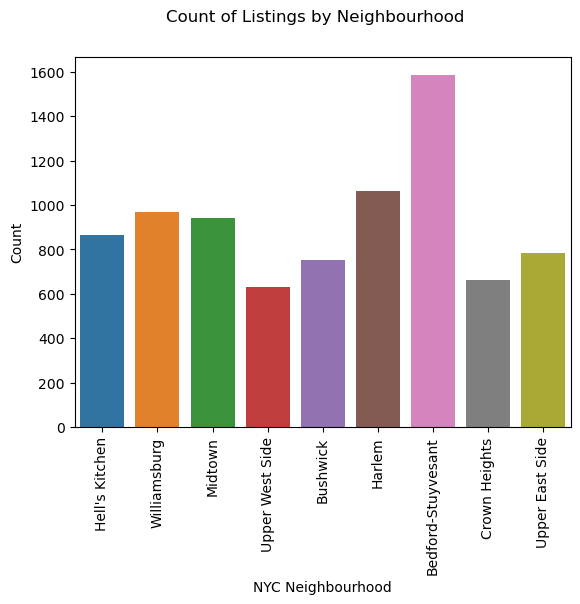

In [28]:
# plot the histogram of neighborhoods

# create filter for only value counts over 500 to see top neighborhoods
neighborhood_counts = aircopy["neighbourhood"].value_counts()
filtered_neighborhoods = neighborhood_counts[neighborhood_counts >= 500].index
filtered_neigh_df = aircopy[aircopy["neighbourhood"].isin(filtered_neighborhoods)]

plt.figure()
sns.countplot(filtered_neigh_df, x="neighbourhood")
plt.suptitle("Count of Listings by Neighbourhood")
plt.xlabel("NYC Neighbourhood")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()


In [29]:
# latitude and longitude can possibly be explored in the future if found helpful for model

In [30]:
# looking into room_type
aircopy["room_type"].value_counts()


room_type
Entire home/apt    11549
Private room        8804
Shared room          293
Hotel room           112
Name: count, dtype: int64

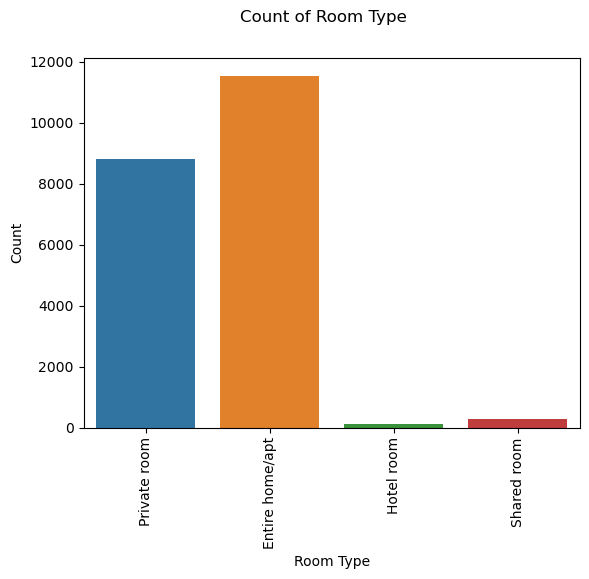

In [31]:
# plot room_type
plt.figure()
sns.countplot(aircopy, x="room_type")
plt.suptitle("Count of Room Type")
plt.xlabel("Room Type")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

In [32]:
# looking into minimum number of nights
aircopy["minimum_nights"].value_counts()

# surprisingly, the minimum night with highest count is 30 nights, monthly rental
# the next highest is 1 night
# -> could feature engineer into binning

minimum_nights
30     16841
1       1529
2        656
3        471
31       353
       ...  
65         1
64         1
19         1
115        1
62         1
Name: count, Length: 69, dtype: int64

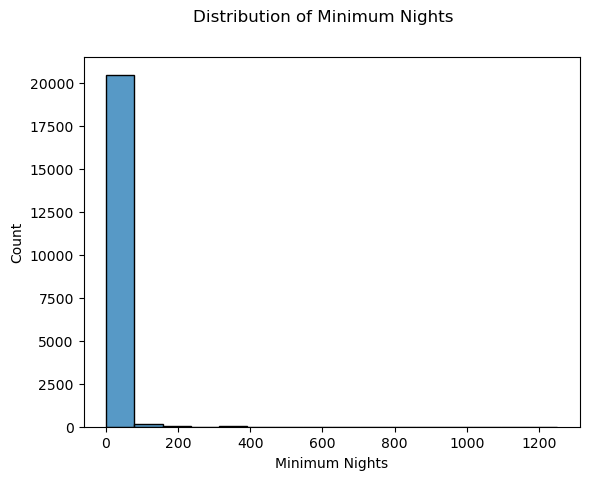

In [33]:
# plot the distribution of minimum nights
plt.figure()
sns.histplot(aircopy, x="minimum_nights")
plt.suptitle("Distribution of Minimum Nights")
plt.xlabel("Minimum Nights")
plt.ylabel("Count")
plt.show()

# 1 to about 80 nights are binned together
# -> change binrange

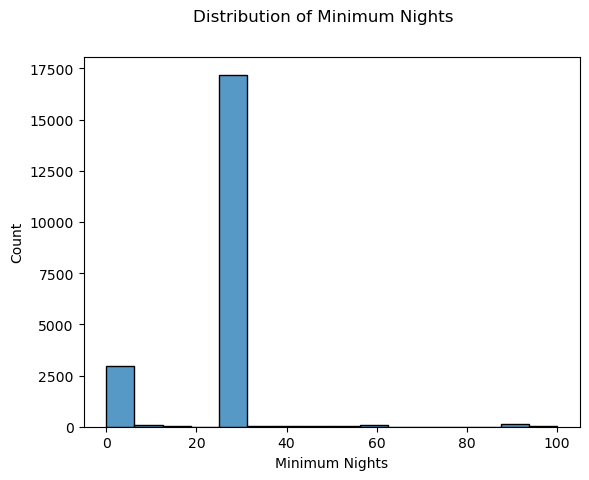

In [34]:
# plot the distribution of minimum nights with binrange 0-100
plt.figure()
sns.histplot(aircopy, x="minimum_nights", binrange=(0, 100))
plt.suptitle("Distribution of Minimum Nights")
plt.xlabel("Minimum Nights")
plt.ylabel("Count")
plt.show()

# mostly two peaks ard 30-night, and 1-night
# -> not a normal dist, should be featured engineered

In [35]:
# looking into number of reviews
aircopy["number_of_reviews"].value_counts()

number_of_reviews
1      2329
2      1429
3      1085
4       862
5       764
       ... 
266       1
319       1
428       1
542       1
412       1
Name: count, Length: 470, dtype: int64

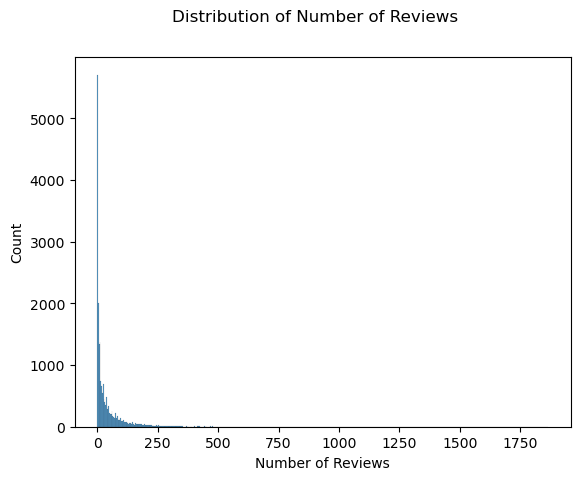

In [36]:
# plot the distribution of number of reviews
plt.figure()
sns.histplot(aircopy, x="number_of_reviews")
plt.suptitle("Distribution of Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Count")
plt.show()

# exponential distribution, will zoom in

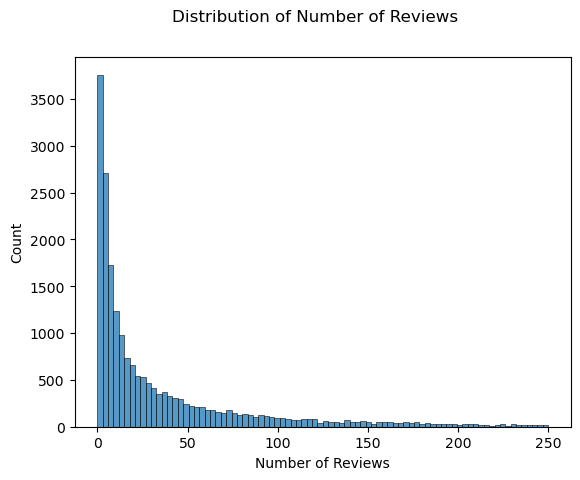

In [37]:
# plot the distribution of number of reviews with binrange
plt.figure()
sns.histplot(aircopy, x="number_of_reviews", binrange=(0,250))
plt.suptitle("Distribution of Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Count")
plt.show()

# clearer exponential curve
# -> could use a form of transformation

In [38]:
# convert last_review from datatype object to datetime
aircopy["last_review"] = pd.to_datetime(aircopy["last_review"])

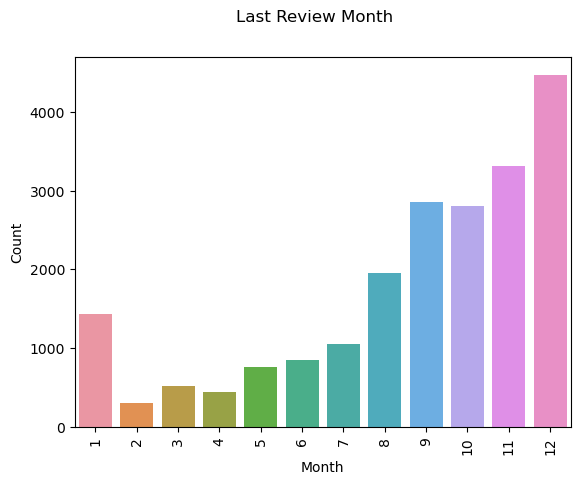

In [39]:
# plot last review

# create month col to plot
aircopy["month"] = aircopy["last_review"].dt.month

plt.figure()
sns.countplot(aircopy, x="month")
plt.suptitle("Last Review Month")
plt.xlabel("Month")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

# interesting trend of gradual increase starting from Feb, look into data collection date
# -> futhur analysis can change dt.month to dt.month_name()

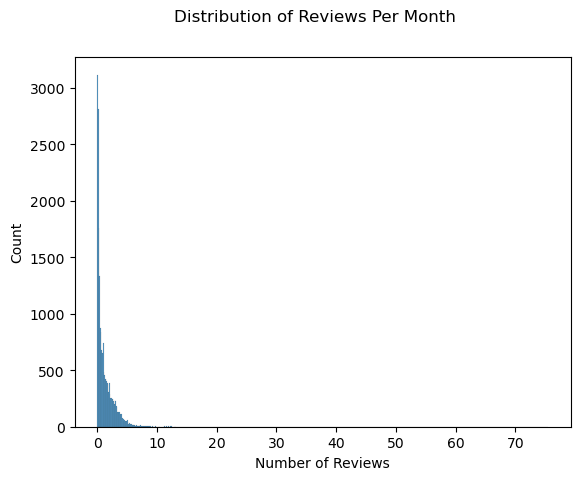

In [40]:
# plot the distribution of reviews per month 
plt.figure()
sns.histplot(aircopy, x="reviews_per_month")
plt.suptitle("Distribution of Reviews Per Month")
plt.xlabel("Number of Reviews")
plt.ylabel("Count")
plt.show()

# too condensed, will zoom in

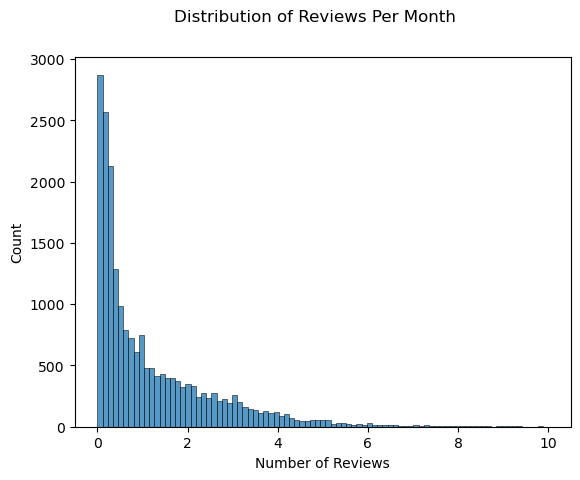

In [41]:
# plot the distribution of reviews per month with binrange 10
plt.figure()
sns.histplot(aircopy, x="reviews_per_month", binrange=(0,10))
plt.suptitle("Distribution of Reviews Per Month")
plt.xlabel("Number of Reviews")
plt.ylabel("Count")
plt.show()

# looks much better zoomed in, seems like an exponential curve
# -> further analysis could use exponential transformer

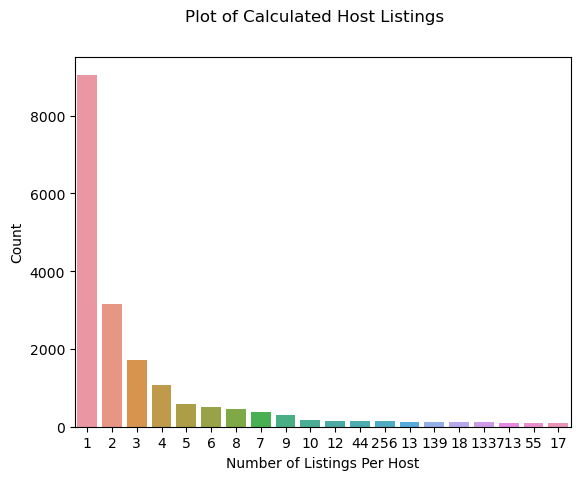

In [42]:
# look into calculated host listings
order_desc = aircopy["calculated_host_listings_count"].value_counts().index

# plot 
plt.figure()
sns.countplot(aircopy,
            x="calculated_host_listings_count",
            order=order_desc[:20])
plt.suptitle("Plot of Calculated Host Listings")
plt.xlabel("Number of Listings Per Host")
plt.ylabel("Count")
plt.show()


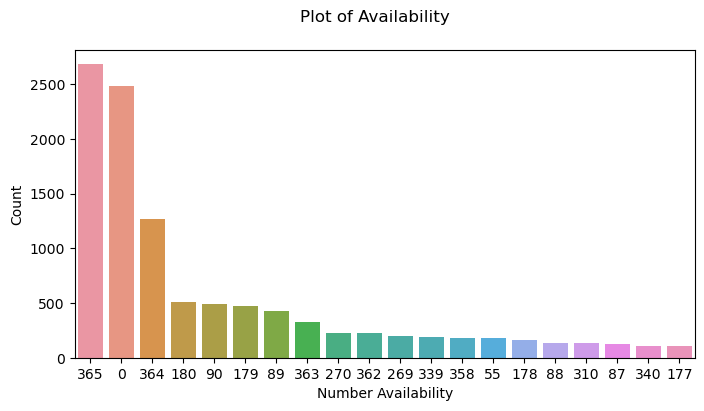

In [43]:
# look into availability
order_desc = aircopy["availability_365"].value_counts().index

# plot 
plt.figure(figsize=(8,4))
sns.countplot(aircopy,
            x="availability_365",
            order=order_desc[:20])
plt.suptitle("Plot of Availability")
plt.xlabel("Number Availability")
plt.ylabel("Count")
plt.show()

# availability 365 and 0 are most common
# -> could use feature eng. perhaps binning

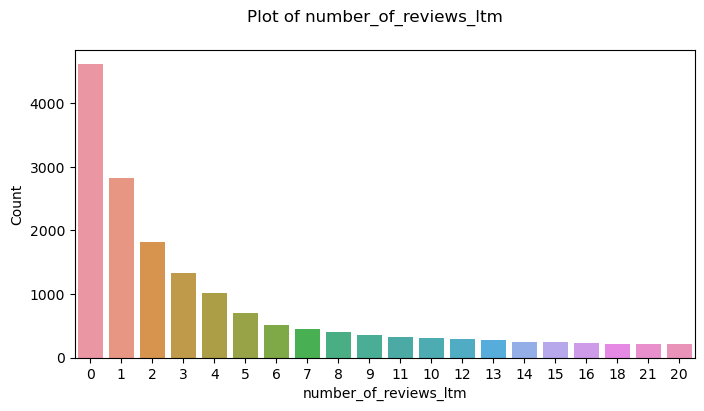

In [44]:
# look into availability
order_desc = aircopy["number_of_reviews_ltm"].value_counts().index

# plot 
plt.figure(figsize=(8,4))
sns.countplot(aircopy,
            x="number_of_reviews_ltm",
            order=order_desc[:20])
plt.suptitle("Plot of number_of_reviews_ltm")
plt.xlabel("number_of_reviews_ltm")
plt.ylabel("Count")
plt.show()

# another exponential curve
# -> could use an exponential transformation

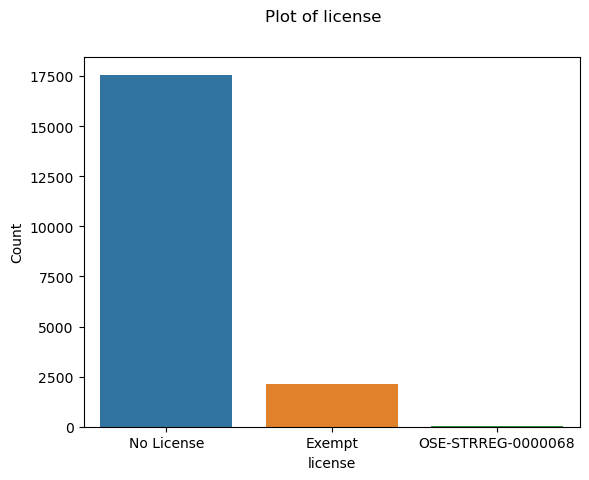

In [45]:
# look into license
order_desc = aircopy["license"].value_counts().index

# plot 
plt.figure()
sns.countplot(aircopy,
            x="license",
            order=order_desc[:3])
plt.suptitle("Plot of license")
plt.xlabel("license")
plt.ylabel("Count")
plt.show()

# most listings do no have a license
# -> could group all of the licenses together into Has_license group

In [46]:
# look into bedrooms
airbnb_df["bedrooms"].value_counts()

# -> further analysis could change Studio to 0, and convert col to dtype int

bedrooms
1         13439
2          3602
Studio     1815
3          1394
4           345
5           112
6            29
7             9
9             6
8             5
15            1
14            1
Name: count, dtype: int64

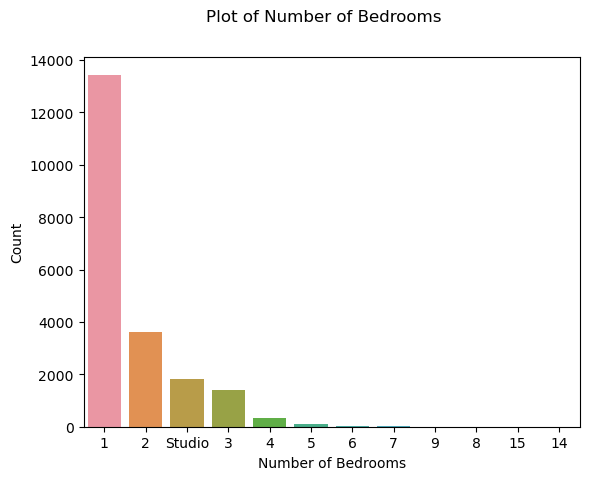

In [47]:
# plot Bedrooms
order_desc = aircopy["bedrooms"].value_counts().index

plt.figure()
sns.countplot(aircopy, x="bedrooms", order=order_desc)
plt.suptitle("Plot of Number of Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Count")
plt.show()

In [48]:
airbnb_df["beds"].value_counts()

beds
1     12310
2      4834
3      2029
4       929
5       335
6       162
7        63
8        49
9        22
10       11
12        5
11        4
21        1
14        1
13        1
18        1
42        1
Name: count, dtype: int64

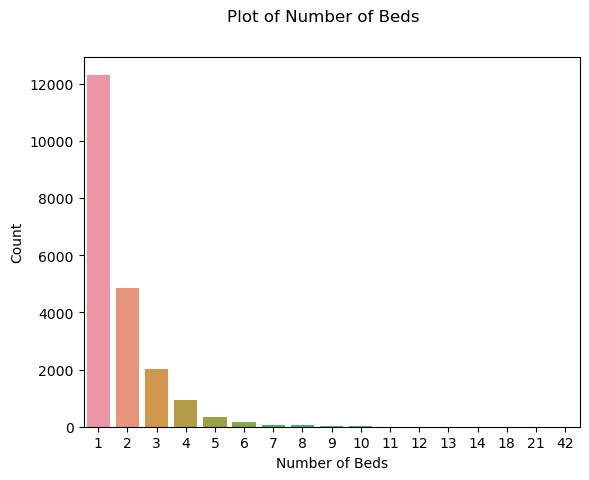

In [49]:
# plot number of beds

plt.figure()
sns.countplot(aircopy, x="beds")
plt.suptitle("Plot of Number of Beds")
plt.xlabel("Number of Beds")
plt.ylabel("Count")
plt.show()

In [50]:
# look into baths
airbnb_df["baths"].value_counts()

# -> further analysis can impute value for number of baths that are "Not specified"

baths
1                17015
2                 2082
1.5               1001
2.5                240
3                  171
0                   82
4                   69
3.5                 50
4.5                 18
Not specified       13
5                    6
6                    4
5.5                  2
6.5                  2
11.5                 1
7                    1
15.5                 1
Name: count, dtype: int64

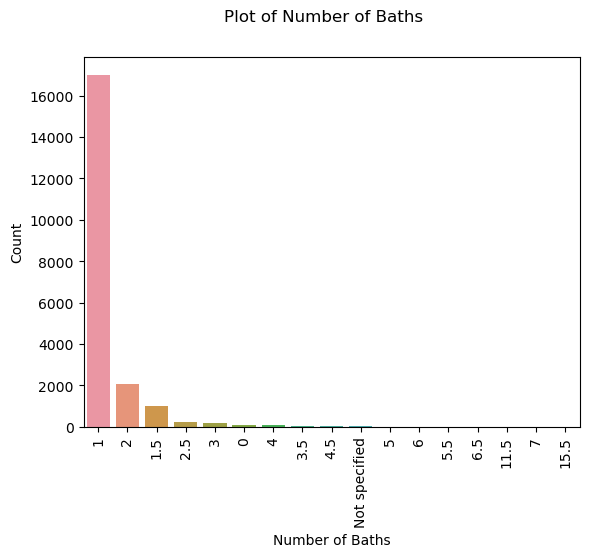

In [51]:
# plot number of baths
order_desc = aircopy["baths"].value_counts().index

plt.figure()
sns.countplot(aircopy, x="baths", order=order_desc)
plt.suptitle("Plot of Number of Baths")
plt.xlabel("Number of Baths")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

# this dataset looks like it has outliers for very large places with over 5 baths
# -> further analysis can experiment with modeling without outiers

### Bivariate Exploration

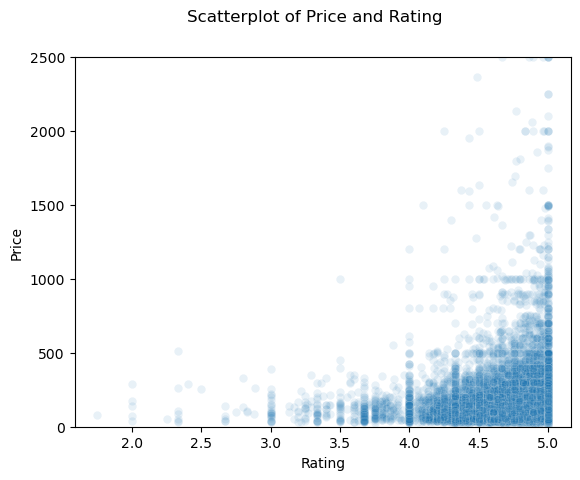

In [52]:
# scatterplot of price and rating
plt.figure()
sns.scatterplot(aircopy, x=air_rating["rating"], y="price", alpha=.1)
plt.suptitle("Scatterplot of Price and Rating")
plt.ylim(0, 2500)
plt.xlabel("Rating")
plt.ylabel("Price")
plt.show()

# looks like there is a relationship, some form of positive correlation

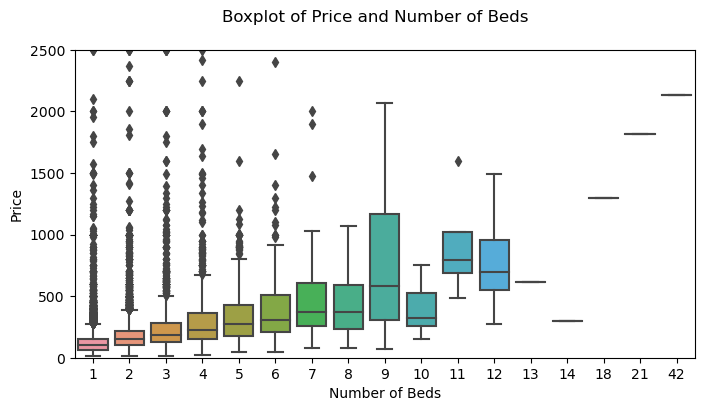

In [53]:
# boxplot of price and beds
plt.figure(figsize=(8,4))
sns.boxplot(aircopy, x="beds", y="price")
plt.suptitle("Boxplot of Price and Number of Beds")
plt.ylim(0, 2500)
plt.xlabel("Number of Beds")
plt.ylabel("Price")
plt.show()

# the trend for price and number of beds is clear from 1-8 beds, after 9 beds, it is more sporadic
# -> further analysis could handle 9+ beds

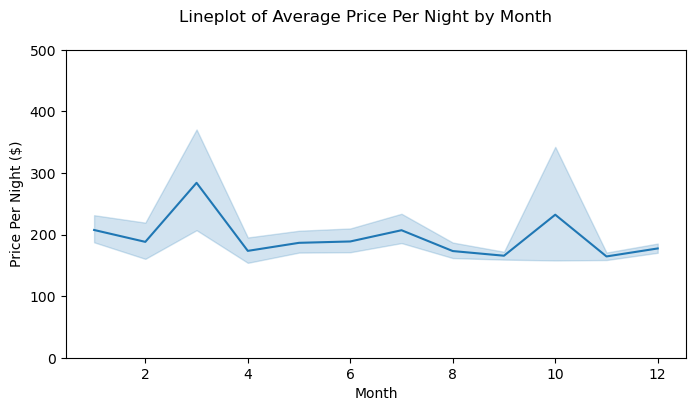

In [54]:
# lineplot of price and month
plt.figure(figsize=(8,4))
sns.lineplot(aircopy, x="month", y="price")
plt.suptitle("Lineplot of Average Price Per Night by Month")
plt.ylim(0, 500)
plt.xlabel("Month")
plt.ylabel("Price Per Night ($)")
plt.show()

# March and October has a slightly higher average
# -> further analysis could look into deeper granularity and look into holidays, etc

<a id="3"></a>
## Part 2: Preprocessing

### Set up preprocessing workflow

To organize the workflow, the columns were sorted into the work that needed to be performed on them.

In [56]:
# make a copy of airbnb df to preprocess
prep_airbnb = aircopy.copy()

In [57]:
cols_2drop = ['id', 'name', 'host_id', 'host_name']

In [58]:
cols_2keep = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
              'reviews_per_month', 'calculated_host_listings_count',
              'availability_365', 'number_of_reviews_ltm', 'beds']

In [59]:
cols_2clean = ['bedrooms', 'baths']

In [60]:
cols_2edit = ['rating', 'neighbourhood', 'last_review']

In [61]:
cols_2onehot = ['neighbourhood_group', 'room_type', 'license']

_______________

### Columns to clean: bedrooms and baths

#### Bedrooms column
The bedrooms column was in string format, with some rows having "Studio" as a value. This column was cleaned by converting "Studio" to 0, which then made it possible to convert the column to integer type, and ready for modeling.

In [62]:
# change bedrooms "Studio" to 0
prep_airbnb.loc[(prep_airbnb["bedrooms"] == "Studio"), "bedrooms"] = 0

# convert col dtype to integer
prep_airbnb["bedrooms"] = prep_airbnb["bedrooms"].astype(int)

#### Baths column
The baths column was also in string format due to some values being "Not specified." To handle imputing an appropriate amount of baths, a dictionary was created using the average amount of baths per beds. The "Not specified" baths values were then filled in with the average baths expected for that amount of beds.

In [171]:
# create a dict to impute the avg bath per bed
baths_notnull = prep_airbnb[prep_airbnb["baths"] != "Not specified"] # subset the baths that are specified

baths_notnull["baths"] = baths_notnull["baths"].astype(float) # convert to float

baths_per_beds = baths_notnull.groupby("beds")["baths"].mean().round() # use the specified baths and beds to create a dict

bath_beds_dict = baths_per_beds.to_dict()


# for the missing baths, impute the avg bath based on the number of beds
prep_airbnb.loc[(prep_airbnb["baths"] == "Not specified"), "baths"] = prep_airbnb["beds"].map(bath_beds_dict)


# convert col dtype to integer
prep_airbnb["baths"] = prep_airbnb["baths"].astype(float)

__________________________

### Columns to edit: ratings, neighbourhood, and last_review

#### Rating column
The rating column contained values ranging from 1.75 to 5.0, as well as 3,593 values of "No rating" and 159 values of "New." Since there were a fair amount of non-numeric values, and they might be predictive, it was decided to keep them. To work around keeping non-numeric values with numeric values, the numeric ratings were binned. Most of the ratings fell between 4 and 5, so the bins were more granular between this range, and less granular with values less than 4. After binning, the whole column was transformed with One Hot Encoding. 

In [68]:
# clean ratings col

# create func to bin ratings
def bin_rating(rating):
    if rating == "No rating": # keep "No Rating" and "New " as strings
        return "No rating"
    elif rating == "New ":
        return "New"
    else:
        rating = float(rating)
        if rating == 5:
            return 5
        elif rating >= 4.8:
            return 4.8
        elif rating >= 4.6:
            return 4.6
        elif rating >= 4.4:
            return 4.4
        elif rating >= 4.2:
            return 4.2
        elif rating >= 4.0:
            return 4.0
        elif rating >= 3.0:
            return 3.0
        elif rating < 3.0:
            return "<3"
        else:
            return "Unknown rating"

In [69]:
# apply func to bin ratings
prep_airbnb["ratings_bin"] = prep_airbnb["rating"].apply(bin_rating)

# convert whole col to string
prep_airbnb["ratings_bin"] = prep_airbnb["ratings_bin"].astype(str)

In [121]:
# instantiate the OneHotEncoder
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

# fit the OneHotEncoder
ratings_encoded_array = one_hot_encoder.fit_transform(prep_airbnb[["ratings_bin"]])

# convert from sparse matrix to dense
ratings_dense_array = ratings_encoded_array.toarray()

# add prefix to feature names
feature_names = [f"ratings_{cat}" for cat in one_hot_encoder.categories_[0]]

# put into a dataframe
ratings_df = pd.DataFrame(ratings_dense_array, columns=feature_names, dtype=int)

In [124]:
ratings_df

,ratings_3.0,ratings_4.0,ratings_4.2,ratings_4.4,ratings_4.6,ratings_4.8,ratings_5,ratings_<3,ratings_New,ratings_No rating
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
20753,0,0,0,0,1,0,0,0,0,0
20754,0,0,0,1,0,0,0,0,0,0
20755,0,0,0,0,0,1,0,0,0,0
20756,0,0,0,0,0,0,1,0,0,0


#### Neighbourhood column
The neighbourhood column seemed to be important to the predication of price, however there were over 100 neighbourhoods, which were too many for dummy variables. So a new column based on the average price per neighbourhood was created to replace the neighbourhood name column.

In [77]:
# find the mean price per neighborhood
mean_prices_byneighborhood = prep_airbnb.groupby("neighbourhood")["price"].mean().round()

# create a dict based on mean price per neighborhood
prices_byneighborhood_dict = mean_prices_byneighborhood.to_dict()

# add column with the avg neighborhood price
prep_airbnb["neighborhood_avgprice"] = prep_airbnb["neighbourhood"].map(prices_byneighborhood_dict)

#### Last review column
The last review column initally contained the date of the last review, this was converted to two new columns, one containing the last review month, and the second containing the last review year.

In [180]:
# last review month
prep_airbnb["last_review_month"] = prep_airbnb["last_review"].dt.month

# last review year
prep_airbnb["last_review_year"] = prep_airbnb["last_review"].dt.year

____________________

### Columns to One Hot Encode: neighbourhood group, room type, and license

#### Neighbourhood group column
The neighborhood group contains the name of the five NYC borough that the listing is located in. This column lended well to One Hot Encoding. 

In [181]:
aircopy["neighbourhood_group"].value_counts()

neighbourhood_group
Manhattan        8038
Brooklyn         7719
Queens           3761
Bronx             949
Staten Island     291
Name: count, dtype: int64

In [127]:
# instantiate the OneHotEncoder
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

# fit the OneHotEncoder neighborhood group
neigh_encoded_array = one_hot_encoder.fit_transform(prep_airbnb[["neighbourhood_group"]])

# convert from sparse matrix to dense
neigh_dense_array = neigh_encoded_array.toarray()

# add prefix to feature names
feature_names = [f"neighgroup_{cat}" for cat in one_hot_encoder.categories_[0]]

# put into a dataframe
neigh_group_df = pd.DataFrame(neigh_dense_array, columns=feature_names, dtype=int)

In [128]:
neigh_group_df

,neighgroup_Bronx,neighgroup_Brooklyn,neighgroup_Manhattan,neighgroup_Queens,neighgroup_Staten Island
0,0,1,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
20753,0,0,1,0,0
20754,0,0,1,0,0
20755,0,0,1,0,0
20756,0,0,1,0,0


#### Room type column
The room type contains information on whether the listing was an entire home, a private room, a shared room, or a hotel room. This column was converted into dummy variables with One Hot Encoding. 

In [169]:
# instantiate the OneHotEncoder
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

# fit the OneHotEncoder to room type
roomtype_encoded_array = one_hot_encoder.fit_transform(prep_airbnb[["room_type"]])

# convert from sparse matrix to dense
roomtype_dense_array = roomtype_encoded_array.toarray()

# add prefix to feature names
feature_names = [f"roomtype_{cat}" for cat in one_hot_encoder.categories_[0]]

# put into a dataframe 
roomtype_df = pd.DataFrame(roomtype_dense_array, columns=feature_names, dtype=int)


In [170]:
roomtype_df

,roomtype_Entire home/apt,roomtype_Hotel room,roomtype_Private room,roomtype_Shared room
0,0,0,1,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
20753,0,0,1,0
20754,1,0,0,0
20755,1,0,0,0
20756,1,0,0,0


#### License column
The license column indicated whether a listing had "No license," was license "Exempt," or listed the property's license number. Since the individual license number had little predictive power on the listing price, it was grouped into one group called "Has license." These groups were then One Hot Encoded. 

In [98]:
prep_airbnb["license"].value_counts()

license
No License            17569
Exempt                 2135
OSE-STRREG-0000068       14
OSE-STRREG-0008664        6
OSE-STRREG-0000437        6
                      ...  
OSE-STRREG-0000131        1
OSE-STRREG-0000288        1
OSE-STRREG-0000215        1
OSE-STRREG-0000985        1
OSE-STRREG-0000513        1
Name: count, Length: 879, dtype: int64

In [99]:
# create func to group license
def group_license(license):
    if license == "No License": 
        return "No License"
    elif license == "Exempt":
        return "Exempt"
    else:
        return "Has License"

In [100]:
# apply func to license
prep_airbnb["license"] = prep_airbnb["license"].apply(group_license)

In [133]:
# instantiate the OneHotEncoder
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

# fit the OneHotEncoder to license
license_encoded_array = one_hot_encoder.fit_transform(prep_airbnb[["license"]])

# convert from sparse matrix to dense
license_dense_array = license_encoded_array.toarray()

# add prefix to feature names
feature_names = [f"license_{cat}" for cat in one_hot_encoder.categories_[0]]

# put into a dataframe 
license_df = pd.DataFrame(license_dense_array, columns=feature_names, dtype=int)

In [134]:
license_df

,license_Exempt,license_Has License,license_No License
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
20753,0,0,1
20754,0,0,1
20755,0,0,1
20756,0,0,1


--------

### Finalize cleaned_airbnb dataframe for modeling

A finalized cleaned_airbnb dataframe was assembled in preparation for modeling. The unneeded columns were dropped from the dataframe, and the OneHotEncoded dataframes containing the neighborhood group, room type, ratings, and license were concatenated. The finalized cleaned_airbnb dataframe contains 38 columns and all are either in integer or float format, ready for linear regression modeling.

In [136]:
prep_airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths', 'month', 'ratings_bin',
       'neighborhood_avgprice', 'last_review_month', 'last_review_year'],
      dtype='object')

In [137]:
# create list of additional cols to drop after feature eng.
cols_2drop_addt = ['neighbourhood_group', 'neighbourhood', 'room_type', 'last_review', 'license', 'rating', 'ratings_bin']

# add to the original cols to drop
cols_2drop.extend(cols_2drop_addt)

In [138]:
# create a copy called cleaned_airbnb to drop columns
cleaned_airbnb = prep_airbnb.copy()

In [139]:
# drop unneeded columns
cleaned_airbnb = cleaned_airbnb.drop(columns=cols_2drop)

In [140]:
# add in the OneHotEncoded dfs
cleaned_airbnb = pd.concat([cleaned_airbnb, neigh_group_df, roomtype_df, license_df, ratings_df], axis=1)

In [141]:
# check to columns
cleaned_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        20758 non-null  float64
 1   longitude                       20758 non-null  float64
 2   price                           20758 non-null  float64
 3   minimum_nights                  20758 non-null  int64  
 4   number_of_reviews               20758 non-null  int64  
 5   reviews_per_month               20758 non-null  float64
 6   calculated_host_listings_count  20758 non-null  int64  
 7   availability_365                20758 non-null  int64  
 8   number_of_reviews_ltm           20758 non-null  int64  
 9   bedrooms                        20758 non-null  int64  
 10  beds                            20758 non-null  int64  
 11  baths                           20758 non-null  float64
 12  month                           

__________________

<a id="4"></a>
## Part 3: Modeling

In [142]:
# split the data into train and test sets
X = cleaned_airbnb.loc[:, cleaned_airbnb.columns != "price"]
y = cleaned_airbnb["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# optional:

# sample for quicker test runs
sample_airbnb = cleaned_airbnb.sample(n=5000, random_state=1)

# split the data into train and test sets
X = sample_airbnb.loc[:, sample_airbnb.columns != "price"]
y = sample_airbnb["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [143]:
# fit logistic regression model to xtrain
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# get scores for train and test
print(f"Train score: {linreg.score(X_train, y_train)}")
print(f"Test score: {linreg.score(X_test, y_test)}")

Train score: 0.011133861555947533
Test score: 0.11910201116752861


In [150]:
estimators = [("scaler", StandardScaler()),
              ("pca", PCA()),
              ('linreg', LinearRegression())]

cachedir = mkdtemp()
pipe = Pipeline(estimators, memory=cachedir)

params = {"scaler": [StandardScaler(), None], 
          "pca__n_components": [5, 10, 20,]
}

grid_search = GridSearchCV(pipe, param_grid=params, cv=5)


In [151]:
linreg_best = grid_search.fit(X_train, y_train)

In [152]:
linreg_best.score(X_test, y_test)

0.1392096521570777

In [153]:
linreg_best.best_estimator_

Pipeline(memory='/var/folders/s2/vdwvjj2j24d4tg5yz10ycr080000gn/T/tmp77po6dkz',
         steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=10)),
                ('linreg', LinearRegression())])

In [155]:
y_pred = linreg_best.predict(X_test)

# Display results
print("Predictions:", y_pred)
print("True_value:", y)



Predictions: [214.89722376 157.41986463 206.23302182 ...  13.14343365 286.79478279
 246.92163096]
True_value: 0         55.0
1        144.0
2        187.0
3        120.0
4         85.0
         ...  
20753     45.0
20754    105.0
20755    299.0
20756    115.0
20757    102.0
Name: price, Length: 20758, dtype: float64


In [159]:
len(y_test)

4152

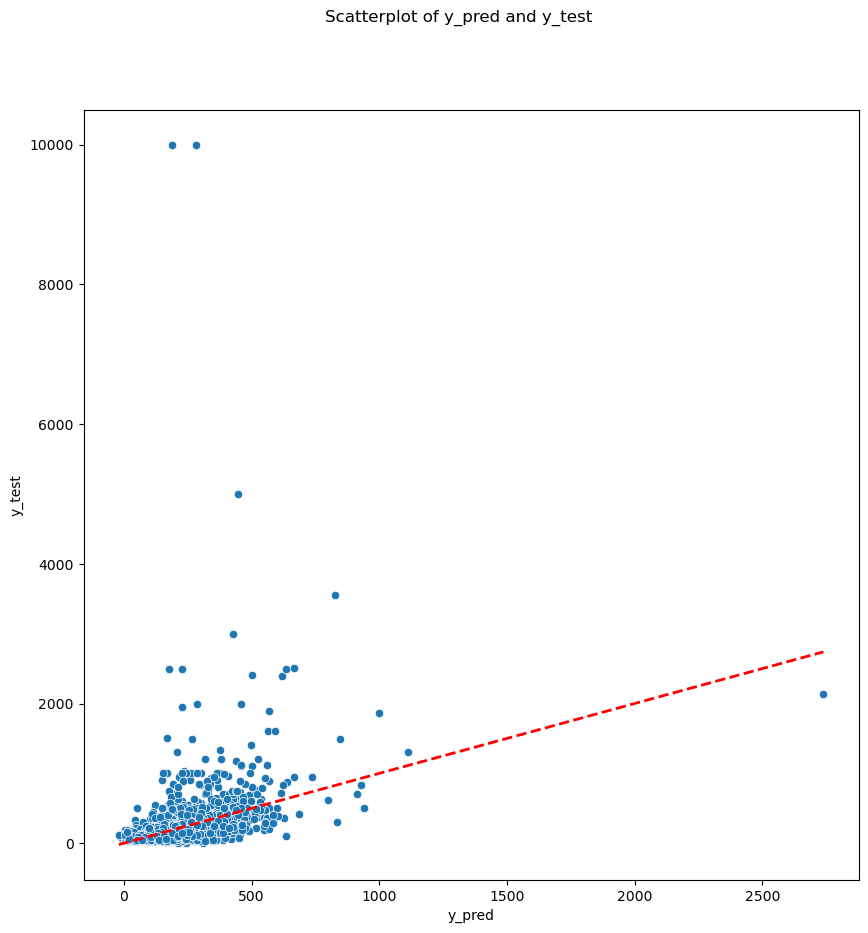

In [168]:
# scatterplot

plt.figure(figsize=(10,10))
ax = sns.scatterplot(x=y_pred, y=y_test)
plt.suptitle("Scatterplot of y_pred and y_test")
plt.xlabel("y_pred")
plt.ylabel("y_test")

x_vals = np.linspace(y_pred.min(), y_pred.max(), 100)
ax.plot(x_vals, x_vals, color='red', linestyle='--', linewidth=2) 

plt.show()






<a id="5"></a>
## Conclusion